# <center> Предсказание цены мотоцикла </center>
## <center> Разведочный анализ данных </center>

Рассмотрим датасет мотоциклов, который можно скачать [тут](https://www.kaggle.com/datasets/nehalbirla/motorcycle-dataset).

Описание датасета:
The columns in the given dataset are as follows:

- name
- selling price -- цена, по которой продается мотоцикл
- year -- год, в котором мотоцикл был куплен
- seller type -- тип продавца (частный или дилер)
- owner -- количество предыдущих хозяев мотоцикла
- km driven -- пробег мотоцикла в километрах
- ex showroom price -- цена мотоцикла в магазине


Необходимо решить задачу регресии и научиться предсказывать целовой признак **selling_price** -- цену, по которой продается мотоцикл.

Сперва подключим необходимые библиотеки.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# устанавливаем точность чисел с плавающей точкой
%precision %.4f

import warnings
warnings.filterwarnings('ignore')  # отключаем предупреждения

Считываем обучающую выборку.

In [2]:
df = pd.read_csv('./bike_details.csv')

In [3]:
df.count()

name                 1061
selling_price        1061
year                 1061
seller_type          1061
owner                1061
km_driven            1061
ex_showroom_price     626
dtype: int64

In [4]:
df.head()

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


Проверяем общее количество пропущенных значений.

In [5]:
df.isnull().sum()

name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

Признак **ex_showroom_price** имеет пропущенные значения. Остальные признаки не имеют пропущенных данных, поэтому нет не обходимости дополняьт их специфичными признакам значениями. Будем это учитывать в дальнейшем при очистке данных.

Также сразу появляется интерес посмотреть на статистику по целевому признаку. А именно, сколько каких значений он принимает. Для этого воспользуемся функцией <code>value_counts()</code>.

In [6]:
df['selling_price'].value_counts()

25000    77
35000    66
50000    63
40000    63
30000    62
         ..
39000     1
83299     1
14700     1
19000     1
31000     1
Name: selling_price, Length: 130, dtype: int64

Признак selling_price -- количественный, поэтому используем для его анализа ящик с усами.

<AxesSubplot: xlabel='selling_price'>

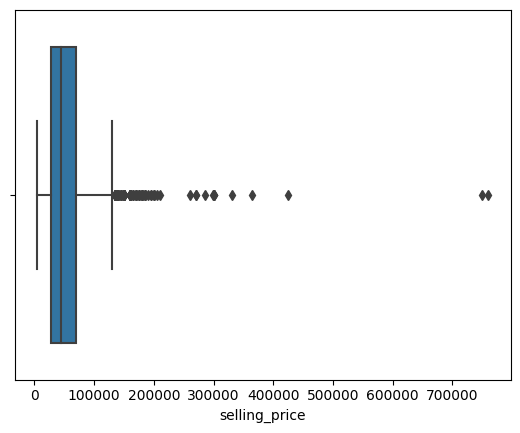

In [7]:
sns.boxplot(x=df['selling_price'])

Из графика видно, что у нас есть некоторые выбросы, которые мешают анализу. Уберем эти выбросы.

<AxesSubplot: xlabel='selling_price'>

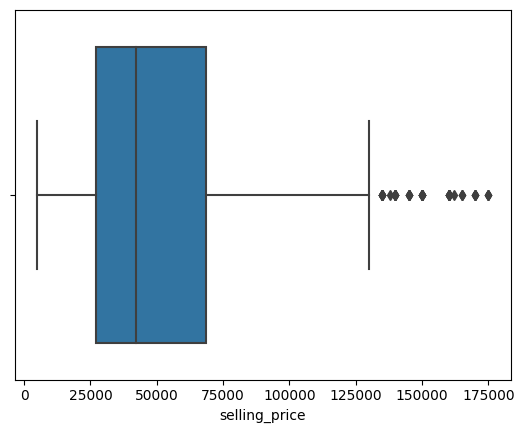

In [8]:
q = df['selling_price'].quantile(0.975)
df_2 = df[df['selling_price'] < q]
sns.boxplot(x=df_2['selling_price'])

Видим, что основная масса мотоциклов продается по цене, меньшей, чем 125000.
Посмотрим, какое среднее значение цены было у мотоцикла.

In [9]:
df['selling_price'].mean()

59638.1517

Далее проведём первичный анализ признаков по отдельности и попарно. Особенно интересуют зависимости целевого признака от нецелевых. 

## Первичный анализ признаков

Признак Name содержит слишком много уникальных значений, хотя в названии каждого велосипеда как правило присутствует бренд. На основе признака Name cформируем новый признак Brand, а признак Name в дальнейшем удалим. 

In [10]:
def bike_model(model_name, excl_honda_hero=False):
    model_list = []
    if excl_honda_hero:
        for i in df['name']:
            if model_name in i and 'Hero' not in i:
                model_list.append(i)
        return model_list
    else:
        for i in df['name']:
            if model_name in i:
                model_list.append(i)
        return model_list

In [11]:
royal_enfield = bike_model('Royal Enfield')
honda = bike_model('Honda',excl_honda_hero=True)
bajaj = bike_model('Bajaj')
yamaha = bike_model('Yamaha')
suzuki = bike_model('Suzuki')
hero = bike_model('Hero')
tvs = bike_model('TVS')
ktm = bike_model('KTM')

In [12]:
def brand(i):
    if i in royal_enfield:
        return 'Royal Enfield'
    elif i in honda:
        return 'Honda'
    elif i in bajaj:
        return 'Bajaj'
    elif i in yamaha:
        return 'Yamaha'
    elif i in hero:
        return 'Hero'    
    elif i in tvs:
        return 'TVS'    
    elif i in suzuki:
        return 'Suzuki'  
    elif i in ktm:
        return 'KTM' 
    else:
        return 'Other'

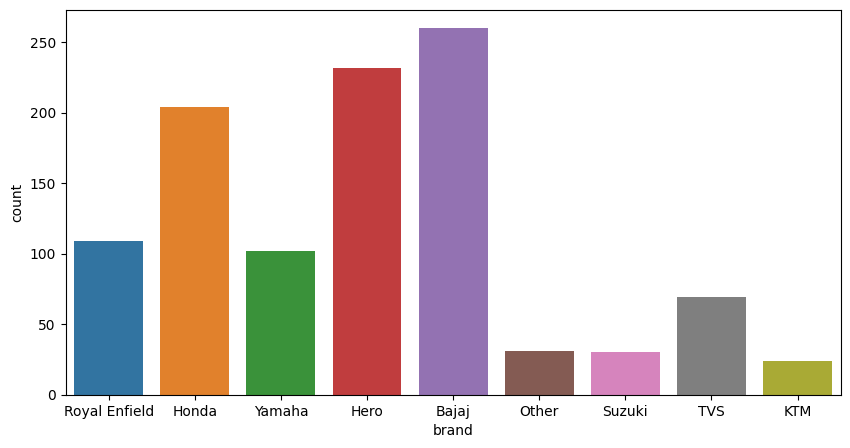

In [13]:
df['brand'] = df['name'].apply(lambda x: brand(x))
sns.countplot(x=df['brand'])
fig = plt.gcf()
fig.set_size_inches(10, 5)

Как видно, создание нового признака brand было уместным --- к категории Other относится совсем немного мотоциклов. Можно будет удалить признак name.

### Количественный признак Year

(array([  2.,   1.,   3.,  10.,   6.,  68., 116., 204., 298., 353.]),
 array([1988. , 1991.2, 1994.4, 1997.6, 2000.8, 2004. , 2007.2, 2010.4,
        2013.6, 2016.8, 2020. ]),
 <BarContainer object of 10 artists>)

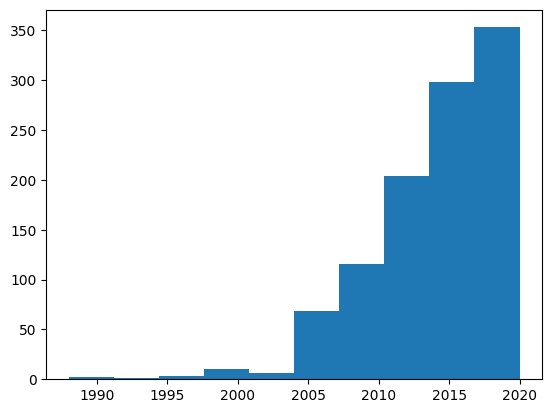

In [14]:
plt.hist(x=df['year'])

<AxesSubplot: xlabel='year'>

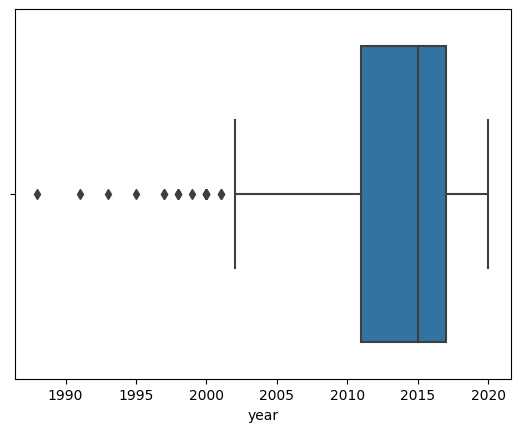

In [15]:
sns.boxplot(x=df['year'])

Большинство мотоциклов были куплены в период с 2005 по 2020 год.  

## Количественный признак km_driven

(array([1.022e+03, 2.900e+01, 2.000e+00, 2.000e+00, 0.000e+00, 3.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([3.50000e+02, 8.83150e+04, 1.76280e+05, 2.64245e+05, 3.52210e+05,
        4.40175e+05, 5.28140e+05, 6.16105e+05, 7.04070e+05, 7.92035e+05,
        8.80000e+05]),
 <BarContainer object of 10 artists>)

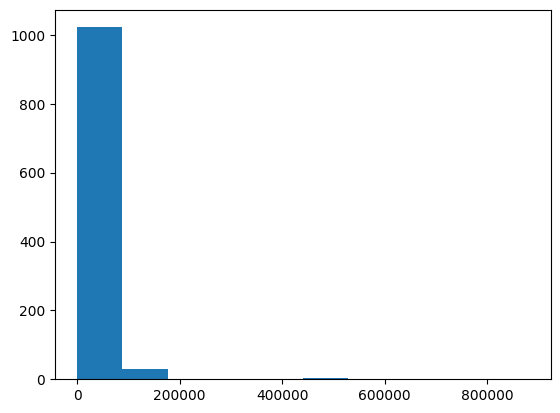

In [16]:
plt.hist(x=df['km_driven'])

Большинство мотоциклов имеет пробег до 200000км.

### Категориальный признак seller_type

<AxesSubplot: xlabel='seller_type', ylabel='count'>

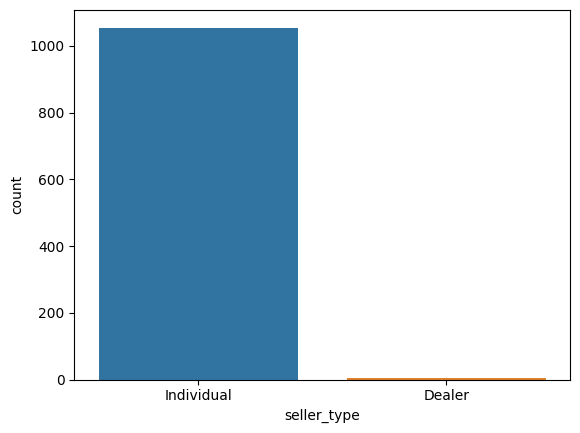

In [17]:
sns.countplot(x=df['seller_type'])

Подавляющее большинство велосипедов продается частными лицами, поэтому перед обучением удалим этот признак.

### Категориальный признак owner

<AxesSubplot: xlabel='owner', ylabel='count'>

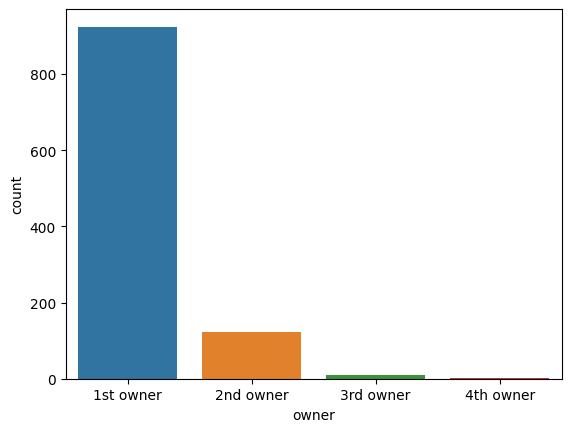

In [18]:
sns.countplot(x=df['owner'])

Большинство велосипедов имели только одного владельца.

### Двумерный анализ признаков

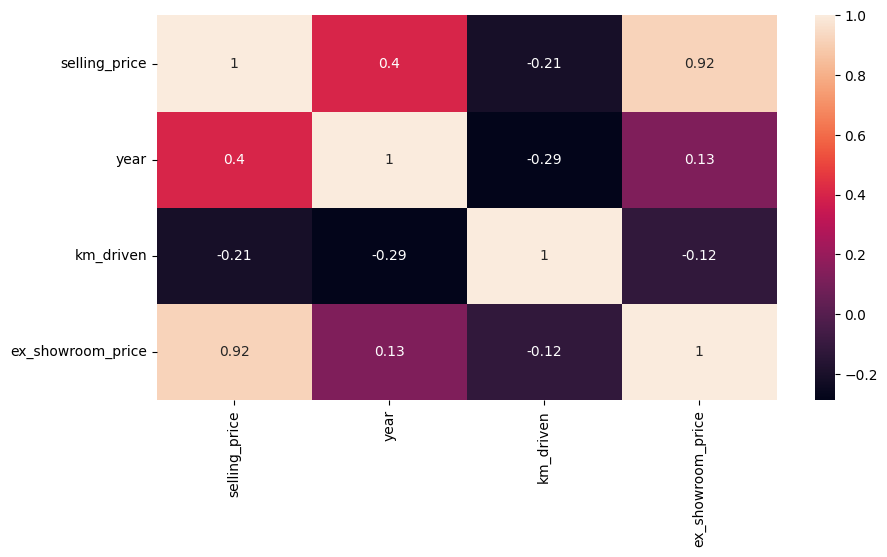

In [19]:
sns.heatmap(df.corr(), annot=True)
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()

Из карты признаков видна высокая корелляция признаков selling_price и ex_showroom_price. Так как признак ex_showroom_price имеет пропущенные значения, кажется целесообразным убрать его в процессе чистки. Еще из карты видна кажущаяся естественной корелляция километров пробега (km_driven) и возраста мотоцикла (year) --- чем больше лет мотоциклу, тем больше его пробег.

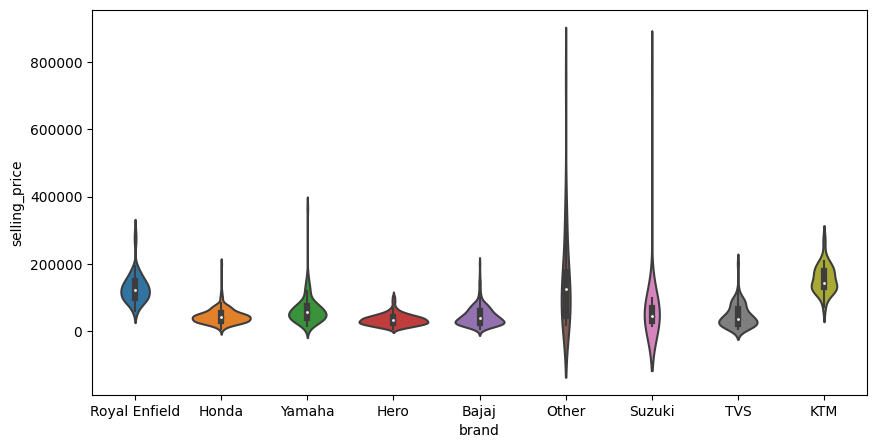

In [20]:
sns.violinplot(data=df,x="brand", y="selling_price", split=True)
fig = plt.gcf()
fig.set_size_inches(10, 5)

Из графика с виолончелями можно сделать вывод, что наименьшую разницу в цене имеют мотоциклы марки Hero. При этом, например, мотоциклы марки KTM в целом дороже мотоциклов марки Hero. Максимальный диапазон цен охватывают мотоциклы марки Suzuki и мотоциклы из категории Other.

Так как вместо признака name мы ввели признак brand, а ex_showroom_price имеет высокую корелляцию с selling_price и большое количество пропущенных значений, их можно удалить. Так как мы собираемся предсказывать значения признака selling_price, его мы тоже удалим. Разобьем датасет на тестовую и обучающую выборки, используя существующие методы. Также трансформируем категориальные признаки owner, seller_type, brand с помощью метода get_dummies в наборы соответствующих колонок с булевыми значениями.

In [21]:
df = pd.get_dummies(df, columns = ['owner','brand','seller_type'], drop_first = True)
df = df.drop(columns=["name","ex_showroom_price"])
df.shape

(1061, 15)

## <center> Разбиение на обучающую и тестовые выборки </center>

Подготовим тестовую выборку. Удалим целевой признак и введем фиктивный признак x_0. Также подготовим вектор весов theta, который будем использовать в обучении моделей.

In [22]:
from sklearn.model_selection import train_test_split

df_c = (df - df.mean()) / df.std()
df_c['x_0'] = 1
X = df_c.drop(['selling_price'], axis=1)
y = df_c['selling_price']
theta = np.matrix(np.zeros(shape=[1,X.shape[1]]))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

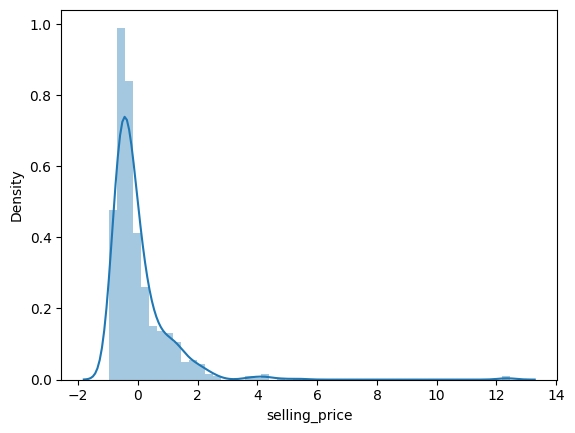

In [23]:
sns.distplot(y_train);

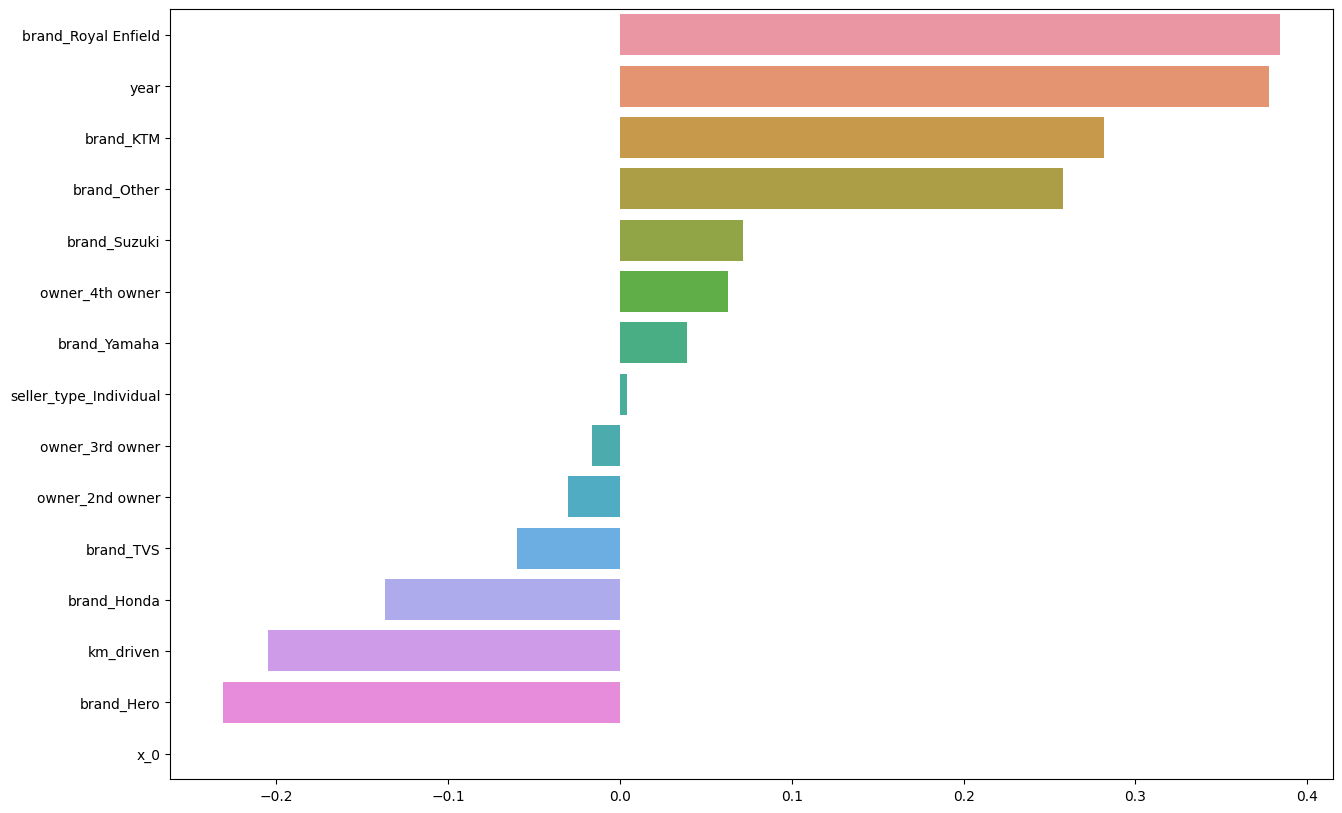

In [24]:
correlations = X_train.corrwith(y_train).sort_values(ascending=False)

plot = sns.barplot(y=correlations.index, x=correlations)
plot.figure.set_size_inches(15, 10)

## <center> Обучение модели </center>
### <center> Градиентный спуск </center>

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error

scaler = StandardScaler()  # воспользуемся стандартным трансформером

# масштабируем обучающую выборку и запоминаем среднее, стандартное отклонение признаков
X_train_scaled = scaler.fit_transform(X_train)

# масштабируем тестовую выборку используя статистики обучающей выборки
X_test_scaled = scaler.transform(X_test)

model = Ridge(alpha=46.4159)
model.fit(X_train_scaled, y_train)
y_test_pred = model.predict(X_test_scaled)
y_train_pred = model.predict(X_train_scaled)

print("Test RMSE = %.4f" % mean_squared_error(y_test, y_test_pred, squared=False))
print("Train RMSE = %.4f" % mean_squared_error(y_train, y_train_pred, squared=False))
print("Train R2 = %.4f" % r2_score(y_train, y_train_pred))
print("Test R2 = %.4f" % r2_score(y_test, y_test_pred))

Test RMSE = 0.5683
Train RMSE = 0.7846
Train R2 = 0.4431
Test R2 = 0.5700


In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))

sorted_weights = sorted(zip(model.coef_, X_train.columns, X_train_scaled.std(axis=0)), reverse=True)
weights = [x[0] for x in sorted_weights]
features = [x[1] for x in sorted_weights]
sns.barplot(y=features, x=weights, ax=ax)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
scales = [x[2] for x in sorted_weights]
sns.barplot(y=features, x=scales, ax=ax)
plt.show()

In [ ]:
d = {
    'metrics\ folds': ['mse-train','mse-test','rmse-train','rmse-test','r2-train','r2-test'],
    'Fold1':['mse-train','mse-test','rmse-train','rmse-test','r2-train','r2-test'],
    'Fold2': ['mse-train','mse-test','rmse-train','rmse-test','r2-train','r2-test'],
    'E': ['mse-train','mse-test','rmse-train','rmse-test','r2-train','r2-test'],
    'STD': ['mse-train','mse-test','rmse-train','rmse-test','r2-train','r2-test'],
}
df1 = pd.DataFrame(data=d)
df1

Запрограммируем градиентный спуск

In [ ]:
def calculateGradient(X, y, theta, j, alpha, lam):
    error = (X * theta.T) - y
 #   print("error = ", error)
    term = np.multiply(error, X[:,j])
 #   print("term = ", term)
    return ((alpha / len(X)) * (np.sum(term) + lam * theta[0,j]))
    

def gradientDescent(X, y, theta, alpha, iters):
    lam = 46.4159
    
    # Define the temp matrix for theta
    temp = np.matrix(np.zeros(theta.shape))
    
    # Number of parameters to iterate through
    parameters = int(theta.ravel().shape[1])
    
    # Calculate the error at each step
    for i in range(iters):
        for j in range(parameters):
            grad = calculateGradient(X,y,theta,j,alpha,lam)
            temp[0,j] = theta[0,j] - grad
            
        theta = temp
    return theta

In [ ]:
alpha = 0.1
iters = 100
theta_final = gradientDescent(np.asmatrix(X_train_scaled), np.matrix(y_train.values).T, theta, alpha, iters)
y_pred = np.asmatrix(X_test_scaled) * theta_final.T
print(r2_score(y_test, y_pred))
print(theta_final)

In [ ]:
from random import randrange

def gradientStochasticDescent(X, y, theta, alpha, iters):
    print("X.shape=", X.shape, "y.shape=", y.shape)
    lam = 0.1
    
    # Define the temp matrix for theta
    temp = np.matrix(np.zeros(theta.shape))
    
    # Number of parameters to iterate through
    parameters = int(theta.ravel().shape[1])
    
    # Calculate the error at each step
    for i in range(iters):
        indice = np.random.choice(X.shape[0], 200, replace=False)
       # print("indice = ", indice)
        shuffle_X = X[indice,:]
        shuffle_y = y[indice,:]
        #print("X = ", X[indice,:], "X = ", X[indice], type(X), type(y))      
        for j in range(parameters):
            grad = calculateGradient(shuffle_X, shuffle_y,theta,j,alpha,lam)
           # print("grad in sto", grad)
            temp[0,j] = theta[0,j] - grad
            
        theta = temp
    return theta


In [ ]:
import time

alpha = 0.1
iters = 100
start_time = time.time()
theta_final = gradientDescent(np.asmatrix(X_train_scaled), np.matrix(y_train.values).T, theta, alpha, iters)
passed_time = time.time() - start_time
y_pred = np.asmatrix(X_test_scaled) * theta_final.T
print(r2_score(y_test, y_pred), "time = ", passed_time)
print(theta_final)

iters = 15000
alpha=0.001
start_time = time.time()
theta_final1 = gradientStochasticDescent(np.asmatrix(X_train_scaled), np.matrix(y_train.values).T, theta, alpha, iters)
passed_time = time.time() - start_time
y_pred = np.asmatrix(X_test_scaled) * theta_final1.T
print(theta_final)
print(r2_score(y_test, y_pred), "time = ", passed_time)

In [ ]:
from sklearn.model_selection import GridSearchCV

alpha_grid = np.logspace(-3, 3, 10)
searcher = GridSearchCV(Ridge(), [{"alpha": alpha_grid}], scoring="neg_root_mean_squared_error", cv=5)
searcher.fit(X_train_scaled, y_train)

plt.plot(alpha_grid, -searcher.cv_results_["mean_test_score"])
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("CV score")
best_alpha = searcher.best_params_["alpha"]
print("Best alpha = %.4f" % best_alpha)

In [ ]:
from sklearn.linear_model import SGDRegressor

model = SGDRegressor(max_iter=1000, tol=0.01)
 
model.fit(X_train_scaled, y_train)
y_train_pred = model.predict(X_train_scaled)  # использование модели для предсказания на обучающей
y_test_pred = model.predict(X_test)  # или на тестовой выборке

print("Test RMSE =", mean_squared_error(y_test, y_test_pred, squared=False))
print("Train RMSE =", mean_squared_error(y_train, y_train_pred, squared=False))
print("R2 =", r2_score(y_train, y_train_pred))
print("R2 =", r2_score(y_test, y_test_pred))
   
from sklearn.model_selection import GridSearchCV

alpha_grid = np.logspace(-3, 3, 10)
searcher = GridSearchCV(SGDRegressor(), [{"alpha": alpha_grid}], scoring="neg_root_mean_squared_error", cv=5)
searcher.fit(X_train_scaled, y_train)

plt.plot(alpha_grid, -searcher.cv_results_["mean_test_score"])
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("CV score")
best_alpha = searcher.best_params_["alpha"]
print("Best alpha = %.4f" % best_alpha)    

## <center> Кросс валидация </center>

In [ ]:
#from sklearn.model_selection import cross_val_score

#cv_scores = cross_val_score(model, X_train.columns, y_train, cv=5, scoring="neg_root_mean_squared_error")
#print("Cross validation scores:\n\t", "\n\t".join("%.4f" % -x for x in cv_scores))
#print("Mean CV MSE = %.4f" % np.mean(-cv_scores))
#stupid_pred = y_train.mean()
#print("Test RMSE with stupid predictor =", mean_squared_error(y_test, stupid_pred * np.ones(y_test.shape),
 #                                                                squared=False))
#print("Train RMSE with stupid predictor =", mean_squared_error(y_train, stupid_pred * np.ones(y_train.shape),
                                                           #       squared=False))